In [1]:
import arviz as az
import pandas as pd
import pystan
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
model = pystan.StanModel(file='galactic.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e901c4fe2de64b805e4b7fba7588a11a NOW.


In [5]:
n=10

In [6]:
data= {
    'nobs': n,
    'robs':10**np.random.uniform(low=-1, high=4, size=n)[0],
    'zobs':10**np.random.uniform(low=-1, high=4, size=n)[0]
}

In [7]:
gaus_data= {
    'N':n,
    'x': 10**np.random.uniform(low=-1, high=4, size=n),
    'y':10**np.random.uniform(low=-1, high=4, size=n),
}

In [8]:
g_model = pystan.StanModel(file='gaussian.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f37b33c2481468380d3d5cceb736ce7d NOW.


In [9]:
fit = g_model.sampling(data=gaus_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c299d2470>,
      dtype=object)

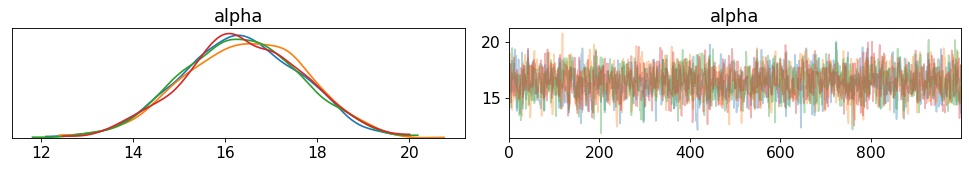

In [10]:
az.plot_trace(fit,  var_names=['alpha'])

In [17]:
fit['alpha']

array([16.20330792, 17.81967344, 15.48517861, ..., 18.09006379,
       14.07359717, 14.36157213])

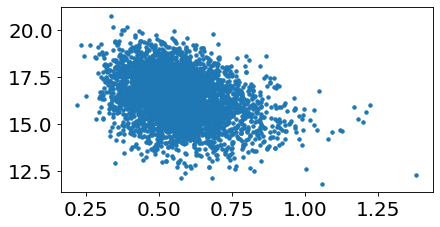

In [25]:
#plt.plot(gaus_data['x'], gaus_data['y'], '.')
plt.plot(fit['rho'], fit['alpha'], '.')